# Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('E:\\Resolve6_Training\\DS_ML\\Sample Data Sets\\Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Our aim is to make clusters from this data that can segment similar clients together.

let’s first normalize the data and bring all the variables to the same scale:

In [3]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


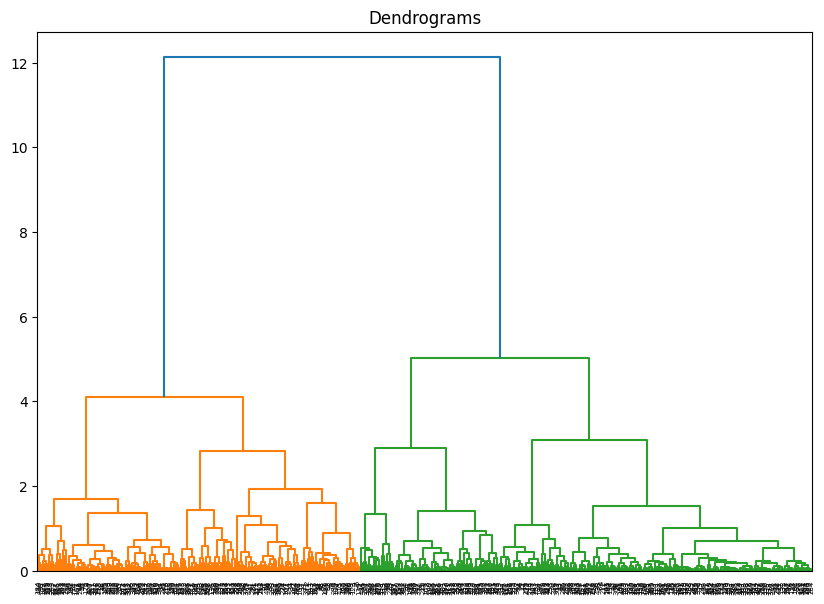

In [4]:
#for Dendrograms
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 6 and cut the dendrogram:

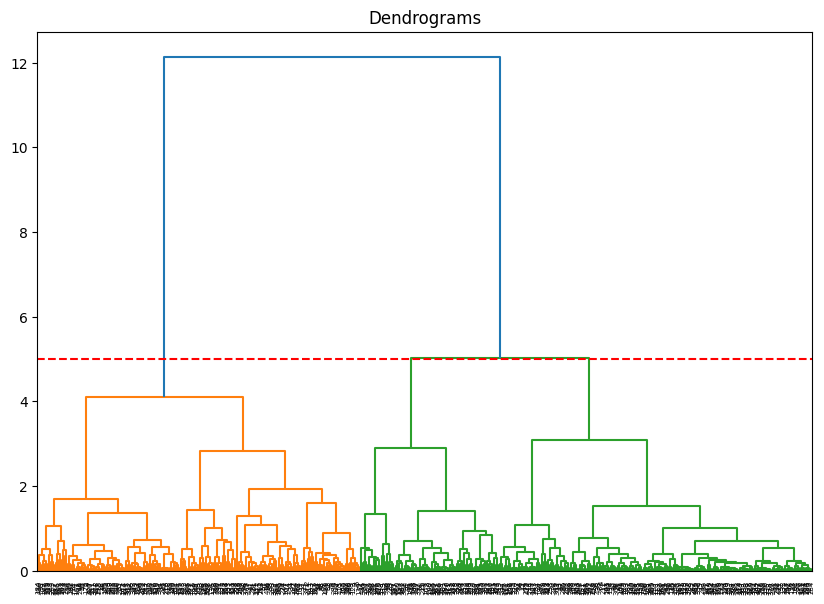

In [5]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=5, color='r', linestyle='--')

In [14]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0,
       0, 1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       2, 1, 1, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 1, 1, 0, 1, 2, 2, 0,
       2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2,
       1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 2, 0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1,
       1, 1, 0, 0, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 0,
       0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 1,

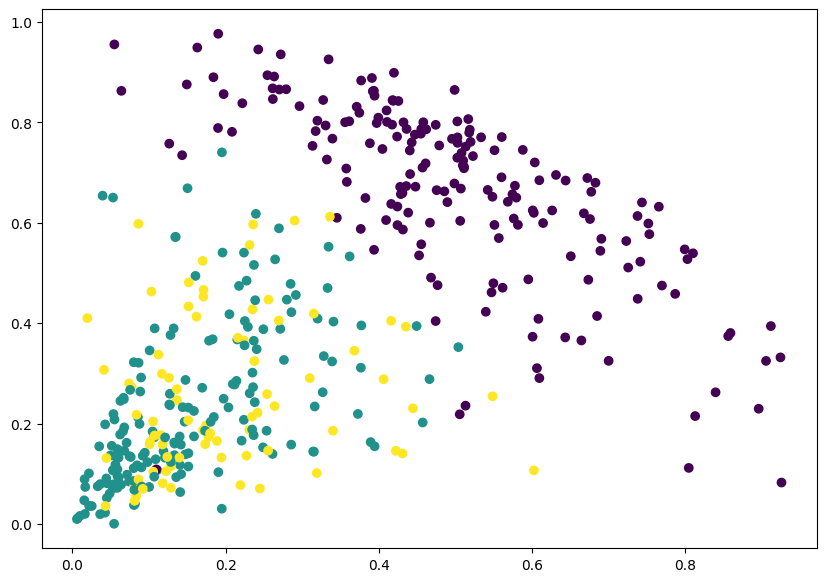

In [15]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 